<a href="https://colab.research.google.com/github/ZenCodex559/Car-price-eda/blob/main/old_car_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing librarys
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Adding data into colab
cols=['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels_engine','location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
file_path='/content/drive/MyDrive/Project/old_car_eda/old_car_price.data.txt'
df = pd.read_csv(file_path, names=cols)

In [3]:
# Checking data frame
df.sample()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels_engine,location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
84,3,?,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,14489


In [4]:
# Checking unique values
for elem in df:
  print('{}:{}'.format(elem,df[elem].unique()))

symboling:[ 3  1  2  0 -1 -2]
normalized_losses:['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make:['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel_type:['gas' 'diesel']
aspiration:['std' 'turbo']
num_of_doors:['two' 'four' '?']
body_style:['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive_wheels_engine:['rwd' 'fwd' '4wd']
location:['front' 'rear']
wheel_base:[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.

In [5]:
# Replacing unwanted values with null
df = df.replace('?',np.NaN)
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels_engine,location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
df.isnull().sum()

symboling               0
normalized_losses      41
make                    0
fuel_type               0
aspiration              0
num_of_doors            2
body_style              0
drive_wheels_engine     0
location                0
wheel_base              0
length                  0
width                   0
height                  0
curb_weight             0
engine_type             0
num_of_cylinders        0
engine_size             0
fuel_system             0
bore                    4
stroke                  4
compression_ratio       0
horsepower              2
peak_rpm                2
city_mpg                0
highway_mpg             0
price                   4
dtype: int64

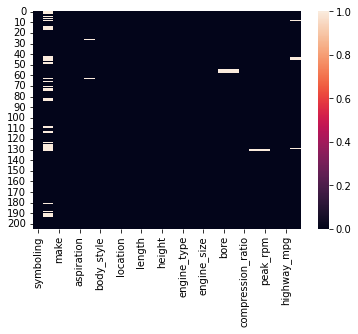

In [7]:
# checking null values with heat map
sns.heatmap(df.isnull())

In [8]:
# Changing data type and replace null values with mean for normalized_losses
df['normalized_losses'] = df['normalized_losses'].astype(float)
df['normalized_losses'] = df['normalized_losses'].fillna(df['normalized_losses'].mean())
df.head(2)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels_engine,location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [9]:
# Changing data type and replace null values with mean for bore
df['bore'] = df['bore'].astype(float)
df['bore'] = df['bore'].fillna(df['bore'].mean())

In [10]:
# Changing data type and replace null values with mean for bore
df['stroke'] = df['stroke'].astype(float)
df['stroke'] = df['stroke'].fillna(df['stroke'].mean())

In [11]:
# Changing data type and replace null values with mean for horsepower
df['horsepower'] = df['horsepower'].astype(float)
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [12]:
# Changing data type and replace null values with mean for bore
df['peak_rpm'] = df['peak_rpm'].astype(float)
df['peak_rpm'] = df['peak_rpm'].fillna(df['peak_rpm'].mean())

In [13]:
# Changing data type and replace null values with mean for bore
df['price'] = df['price'].astype(float)
df['price'] = df['price'].fillna(df['price'].mean())

In [14]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels_engine,location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


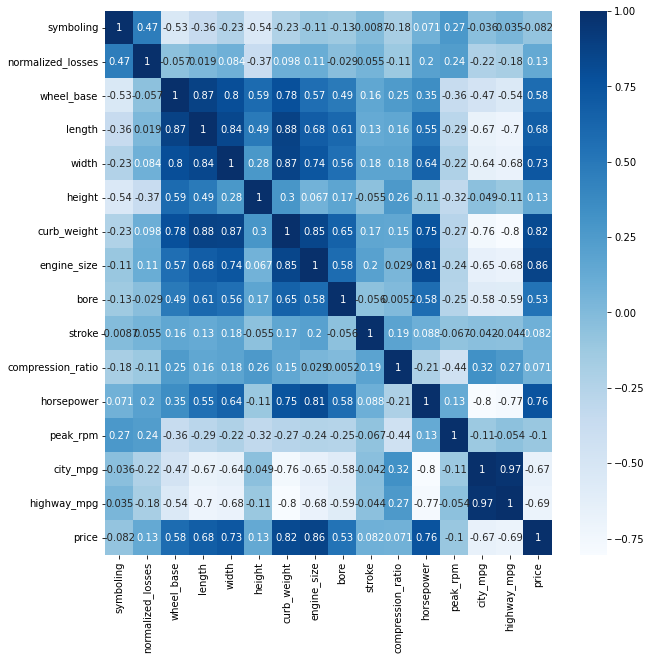

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

positive_corelation:
price = horsepower,engine_size,curb_weight,width,length,wheel_base
horsepower = price,bore,engine_size,curb_weight,length,width
curb_weight = price,horsepower,engine_size,wheel_base
highwway_mpg = city_mpg

Negetive_corelation:
price:highway_mpg,city_mpg


Text(0, 0.5, 'Price')

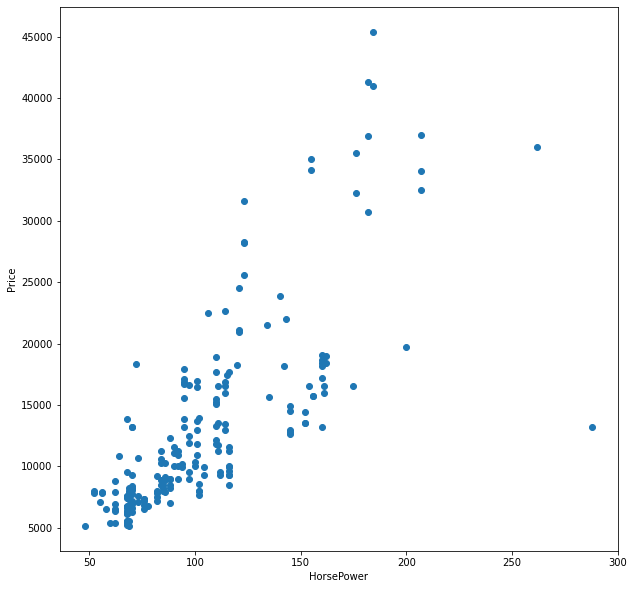

In [17]:
# How horsepower effect the price:

plt.figure(figsize=(10,10))
plt.scatter(x='horsepower',y='price', data=df)
plt.xlabel('HorsePower')
plt.ylabel('Price')
# plt.figure(figsize=(10,10))
# plt.scatter(x='horsepower',y='price',data=df)
# plt.xlabel('Horsepower')
# plt.ylabel('Price')

as we can see most of the car sell which have horse power between 150-200 and price between 5000-25000
lets univariate analysis of the above outliers

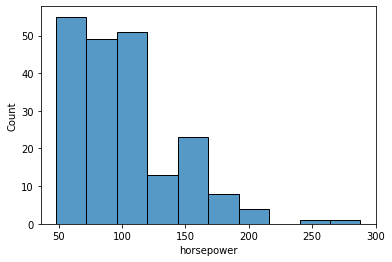

In [18]:
sns.histplot(df.horsepower,bins = 10)

lets see the plot b/w engine_size and price

Text(0, 0.5, 'Price')

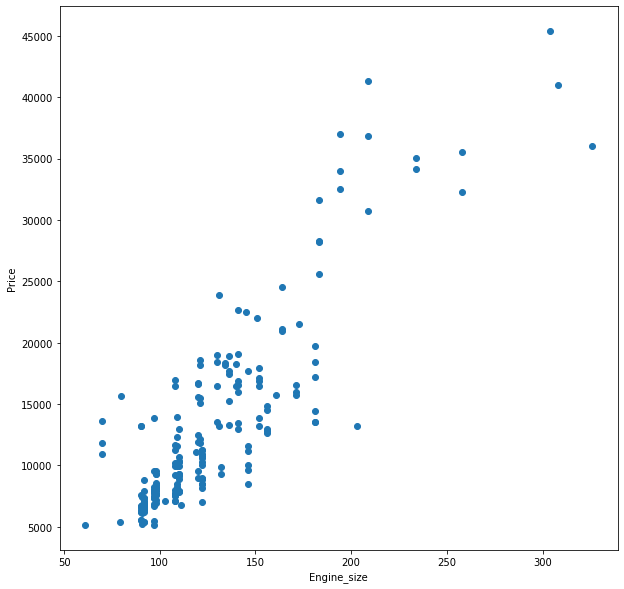

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(x='engine_size', y='price', data=df)
plt.xlabel('Engine_size')
plt.ylabel('Price')

lets see the outliers with univariet analysis

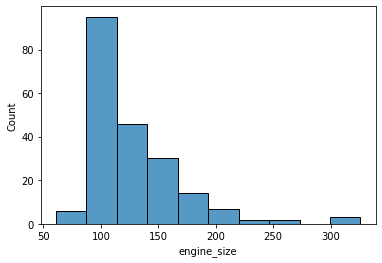

In [20]:
sns.histplot(df.engine_size,bins =10)

# variation of price with no of Doors

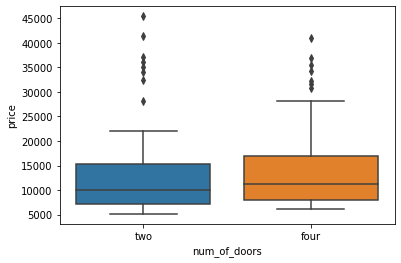

In [21]:
sns.boxplot(x='num_of_doors',y='price',data=df)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            205 non-null    int64  
 1   normalized_losses    205 non-null    float64
 2   make                 205 non-null    object 
 3   fuel_type            205 non-null    object 
 4   aspiration           205 non-null    object 
 5   num_of_doors         203 non-null    object 
 6   body_style           205 non-null    object 
 7   drive_wheels_engine  205 non-null    object 
 8   location             205 non-null    object 
 9   wheel_base           205 non-null    float64
 10  length               205 non-null    float64
 11  width                205 non-null    float64
 12  height               205 non-null    float64
 13  curb_weight          205 non-null    int64  
 14  engine_type          205 non-null    object 
 15  num_of_cylinders     205 non-null    obj

# Let us check the fuel type vs price

In [27]:
sum_groupby=df.groupby('fuel_type').sum().reset_index()

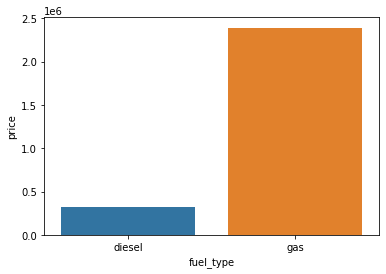

In [28]:
sns.barplot(x='fuel_type',y='price',data=sum_groupby)

#company vs price

In [29]:
sum_groupby=df.groupby('make').sum().reset_index()

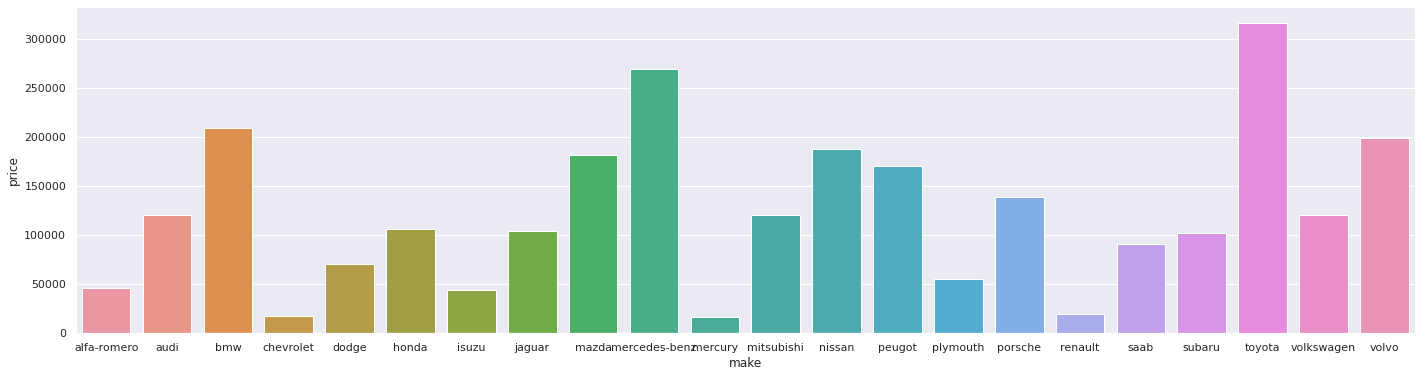

In [42]:
sns.set(rc={'figure.figsize':(24,6)})
sns.barplot(x='make',y='price',data=sum_groupby)


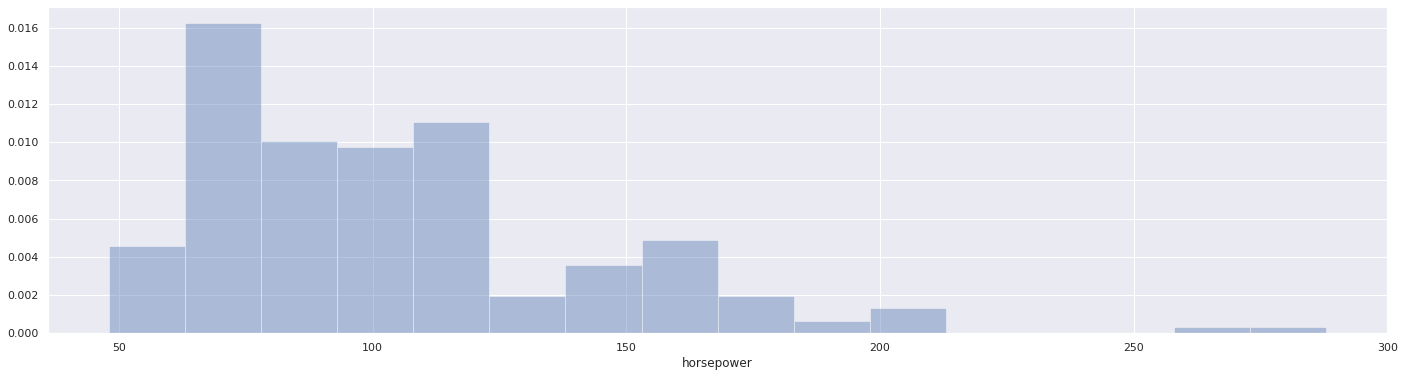

In [40]:
sns.distplot(df['horsepower'], kde=False, norm_hist=True)


#Conclusion
The intended plots easily shows the difference.


*   Horse power from 50-150 takes price within 20000 & got some outlair
*   Same goes for engine size,
price does not vary much for number of doors


*   mostly gas is used as fuel type
*   The most expensive car maker is Toyota and least is chevrolet



